## League of Legends Performance Project

Hello, and welcome to my project! For m6y project I am going to be analazing two sets of data from my League of Legends (LoL) data from the past couple of months. The two data sets that I have collected are my ranked games from this season, which spans over the past 6ish months, as well as my past 103 other games. Those 104 games include normal games, ARAM games, and anything else (mostly those two I believe). There is a pretty big chance that whoever is reading this has no knowledge of LoL, so before we get started there are a couple key words that you should know:
* Gamemodes
    * There are multiple gamemodes in LoL, but the ones I've recorded are Ranked, Norms, and ARAM
    * Norms is the baseline of the game, it is also known as Draft sometimes.
    * Ranked is the competative version of Norms, the exact same game and playstyle, but taken more seriously
    * ARAM is usually known as the "for fun" mode, you don't get to choose your champion, and there are no rolls like the other gamemodes
* Rolls
    * Norms and Ranked have different rolls you can play which is an important attribute in my data. There are 5 rolls; Top, Jungle, Middle, ADC, and Support
* Other terms
    * KDA: This is your Kill-Death- assist ratio. Usually, the higher it the better you did. It is calculated with this equation: $\frac{K+A}{D}$ 
    * CS: This is kind of complicated to explain, but it's kind of a way of tracking how well you were managing multiple things.
    * KP: Kill Participation, this is how many of your Kills or Assists contributed to the team. $\frac{K+A}{Team Kills}$
    * Average Rank: This is a way of determining the average skill of the lobby. The rank goes from Bronze->Silver->Gold->Plat->etc. As well as from 4 being the lowest to 1 being the highest of that specific rank
    
With all of that, we can start looking at the data!

### The Data
As I mentioned, I have two data sets that I'll be analyzing. One comprising of all my ranked games this year, and another of my past 103 games. I got this data from the website op.gg, but had to input the data manually into excel since there was no way of getting it as a csv or json. I think that there will be some interesting information that we can find from these datasets as I usually goof off a lot in norms with my friends, but take ranked more seriously and play the champs that I'm best at.  
Let's go through a couple things I want to look at with this data:
* How well I play in ranked vs. norms
* What champs I play the best and worst with (I can also comparte this to how much I've played the champ)
* How well I play by myself vs. with my friends (this can be determined by the avg rank because one of the friends I play with is a lot higher ranked than the rest of us)
* How my performance differs between which roll I play (this might be skewed because I play Jg and Mid the most but we will see)
* And finally I would love to try and predict how well I would play on a given champion in a given roll, and then play a game and see how accurate it was.
    * There is no way that it will be accurate since there are so many variables that go into a single game, but I think it would be really interesting to try
    

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

ranked_df = pd.read_csv("opgg_ranked.csv", header = 0)
games_df = pd.read_csv("opgg_lasthundred.csv", header = 0)

### Cleaning
Since I inputed all of this data manually, there is very little cleaning that we will have to do. However, I made the ranked dataset a month or so before my other data, so there are a couple inconsistancies we have to fix:
1. I recorded one of the champions in the ranked dataset as "Mundo", but "Dr. Mundo" in the other set, so I'll change all of them to Dr. for consistancy.
2. In the outcome attribute, I'll change "Loss" in the ranked set to "Defeat", as it is what I used in the new one because that is the official name.
3. In the ranked dataset, I labeled "Roll" as N/A for ARAM games, but I will replace those with empty values.  
    * (np.NaN doesn't work with string values so ask about this)

Once those are done, the data should be all set for usage!

In [24]:

for value in ranked_df["Champion"]:
    if "mundo" in value.lower():
        ranked_df.replace(value, "Dr. Mundo", inplace=True)
for value in ranked_df["Result"]:
    if "loss" in value.lower():
        ranked_df.replace(value, "Defeat", inplace=True)

games_df.replace("N/A", np.NaN, inplace=True)



As a test, I'm going to do a hypothysis test to see that if I play a game of Akali, I will get a KDA above 3. (Incomplete)

In [25]:
grouped_by_champ = games_df.groupby("Champion")
akali_df = grouped_by_champ.get_group("Akali")

akali_kda = akali_df["KDA"]
print(len(akali_kda))

print("Akali KDA Test")
print("\tH0 - Mkda <= 3")
print("\tH1 - Mkda > 3")
print("\tsig = 0.01")
print("\tdf = N(akali kda) - 1 = 30")
print("\tt-critical = 2.457")

t = (akali_kda.mean() - 3)/(akali_kda.std()/math.sqrt(len(akali_kda)))
print("\tt-computed =", t)
print("\tt-computed is less than t-critical, therefor reject H0")

31
Akali KDA Test
	H0 - Mkda <= 3
	H1 - Mkda > 3
	sig = 0.01
	df = N(akali kda) - 1 = 30
	t-critical = 2.457
	t-computed = 1.84763315121071
	t-computed is less than t-critical, therefor reject H0


### Graphs
* I'm going to make 2 pi charts for what percent I play what roll, as well as what Champion. I'm going to make the same for ranked as well.

In [26]:
#champs_graph = games_df[games_df.]

# Print the resulting DataFrame
#print(df)

# reset figure, make it square
plt.figure(figsize=(8,8))
# create the bar chart (with pcts)
plt.pie(grouped_by_champ.size(), labels=grouped_by_champ.size(), autopct="%1.1f%%")
plt.show()

AttributeError: 'DataFrameGroupBy' object has no attribute 'items'

After seeing this atrocity I have decided not to make a graph based on the champs I've played. I can still do Rolls though since there are only 5.  

I can probably still do the champion graph for ranked though, because I only played 4 champions in ranked I believe. Let's try that out first

Champion
Dr. Mundo      2
Lillia         8
Mordekaiser    8
Vi             1
dtype: int64


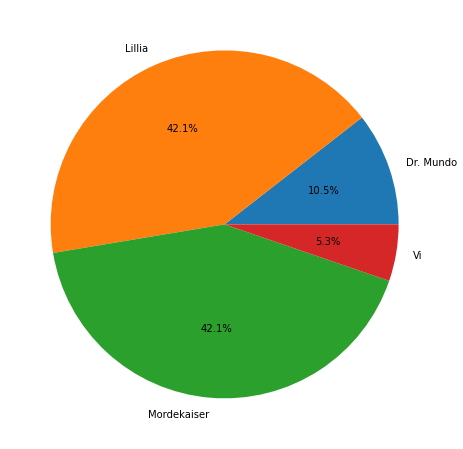

In [ ]:
grouped_by_champ = ranked_df.groupby("Champion")

print(grouped_by_champ.size())

plt.figure(figsize=(8,8))

xs = ["Dr. Mundo", "Lillia", "Mordekaiser", "Vi"]

plt.pie(grouped_by_champ.size(), labels=xs, autopct="%1.1f%%")
plt.show()

Lillia and Mord as my top champs. Not suprised since this data set is so small, I know which ones I played most off the top of my head.

I could also make a bar graph with my average KDA with these champs for ranked since there arn't too many to work with. I am guessing that Mord and Lillia will still be the most since I am more experienced with them.

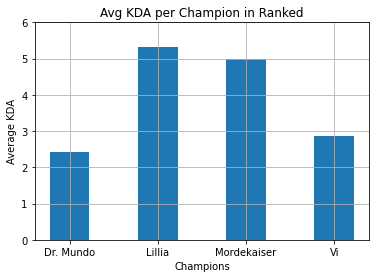

In [ ]:
mundo_df = grouped_by_champ.get_group("Dr. Mundo")
lil_df = grouped_by_champ.get_group("Lillia")
mord_df = grouped_by_champ.get_group("Mordekaiser")
vi_df = grouped_by_champ.get_group("Vi")

# reset figure
plt.figure()

ys = [mundo_df["KDA"].mean(), lil_df["KDA"].mean(), mord_df["KDA"].mean(), vi_df["KDA"].mean()]

xrng = np.arange(len(xs))
yrng = np.arange(0, max(ys)+1, 1)

plt.bar(xrng, ys, 0.45, align="center") 
# note: default alignment is center

plt.xlabel("Champions")
plt.ylabel("Average KDA")
plt.title("Avg KDA per Champion in Ranked")

plt.xticks(xrng, xs)
plt.yticks(yrng)
# turn on the background grid
plt.grid(True)
plt.show()

It seems that I was correct in my guess! I am going to move onto rolls now, but I'm not going to do one for ranked since it would be 100% jungle and that would not make for very interesting data.  

I'm also going to make a Bar Graph along with the Pi Chart again since we have a lot more data with my normal game set, and I honestly have no idea what roll will come out on top.


Roll
ADC         7
Jungle     29
Middle     31
Support     5
Top        20
dtype: int64


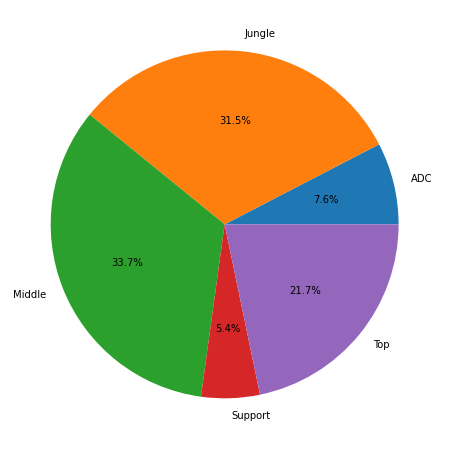

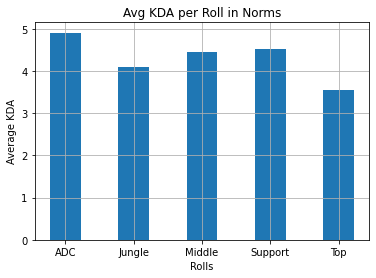

In [ ]:

#Pi Chart
grouped_by_roll = games_df.groupby("Roll")

print(grouped_by_roll.size())

plt.figure(figsize=(8,8))

xs = ["ADC", "Jungle", "Middle", "Support", "Top"]

plt.pie(grouped_by_roll.size(), labels=xs, autopct="%1.1f%%")
plt.show()


#Bar Chart
adc_df = grouped_by_roll.get_group("ADC")
jng_df = grouped_by_roll.get_group("Jungle")
mid_df = grouped_by_roll.get_group("Middle")
sup_df = grouped_by_roll.get_group("Support")
top_df = grouped_by_roll.get_group("Top")

# reset figure
plt.figure()

ys = [adc_df["KDA"].mean(), jng_df["KDA"].mean(), mid_df["KDA"].mean(), sup_df["KDA"].mean(), top_df["KDA"].mean()]


xrng = np.arange(len(xs))
yrng = np.arange(0, max(ys)+1, 1)

plt.bar(xrng, ys, 0.45, align="center") 
# note: default alignment is center

plt.xlabel("Rolls")
plt.ylabel("Average KDA")
plt.title("Avg KDA per Roll in Norms")

plt.xticks(xrng, xs)
plt.yticks(yrng)
# turn on the background grid
plt.grid(True)
plt.show()

This data was really surprising to me. All of the rolls have an extremely similar KDA, although it is kind of sad to see that my most played rolls have the lowest average...  

If I were to have gotten this data from two months ago, I think that the data would have been skewed especially towards jungle, but after playing Akali a lot (who is played top and mid), it increased those almost up to my jungle play rate.  

Later on I would like to do this sorted by some ranks as well. Possibly Gold-Plat(playing with friends) vs. Bronze-Silver(playing alone) to see which I play better.  


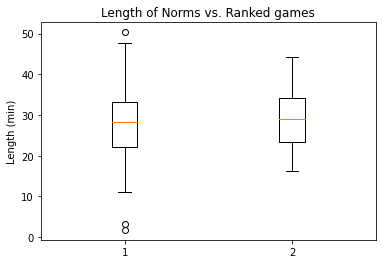

In [ ]:
plt.figure()

xs = ["Norms", "Ranked"]
plt.boxplot([games_df["Length (min)"], ranked_df["Length (min)"]])


plt.ylabel("Length (min)")
plt.title("Length of Norms vs. Ranked games")

plt.show()